In [1]:
import sys
sys.path.insert(1, '../')

Данные [тут](https://drive.google.com/file/d/1dEYj8q5huoqmtG8Pftf53aZyOTtO332Z/view?usp=sharing)

In [2]:
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt
from matplotlib.lines import Line2D
import os
import math
from DataContainers.Experiment import Experiment
from PythonHeplers.IOHelpers import do_with_all_subfolders
from DataAnalyzers.PicksAnalyzer import calc_picks
from Drawing.Draw1D import set_defaults_1D, set_xticks, set_yticks

In [3]:
%matplotlib inline
set_defaults_1D()
base_dir = "D:\\math\\data"

In [4]:
def read_subdir(subdir_name):
    subdir = os.path.join(base_dir, subdir_name)
    def sas(a):
        return Experiment().fill_from_file(a)
    return do_with_all_subfolders(subdir, sas)

def calc_L(e: Experiment) -> float:
    return e.method_parameters['dx']*len(e.init_values['u'])

In [5]:
def draw_pick_stats(subdir, size=500, xmin = 0, xmax = 200):
    results = read_subdir(subdir)
    stats = {}
    for r in results:
        pcks = calc_picks(r.end_values['u'])
        key = calc_L(r)
        if xmin < key < xmax:
            stats[key] = stats.get(key, [])
            stats[key].append((pcks['picks'], pcks['direction']))
    stats = {(k if k > 0 else 0.5):stats[k] for k in sorted(stats)}
    fig, ax = plt.subplots()
    for k in stats:
        data = [t for t in stats[k] if t !=(None, None) ]
        for d in data:
            if d[1] == 'up':
                ax.scatter(k,max(0.5, d[0])-0.005,marker='^', s=size, c='r')
            if d[1] == 'down':
                ax.scatter(k,max(0.5, d[0])+0.005,marker='v', s=size, c='b')
    ax.set_title(f'Пиковость паттернов при L из [{min(stats)}, {max(stats)}] {"обычная" if results[0].model_config["Du"] == 20 else "малая"} диффузия')
    s = set()
    keys = list(stats.keys())
    for k in keys:
        for i in stats[k]:
            if i[0] is not None:
                s.add(i[0])
    print(f'уникальные значения пиковости на отрезке: {s}')
    if all([p is None or p < 0.5 for p in s]):
        ax.set_yticks([-1,0,1])
    else:
        ymin = math.floor(min(s))
        ymax = math.ceil(max(s))
        ystep = max(0.5,min(1, round((ymax-ymin)/5)))
        ax.set_yticks(np.arange(ymin, ymax+0.1,ystep))
    keys_with_peaks = sorted([k for k in stats if any([t != (None, None) for t in stats[k]])])
    step = round(keys[1]-keys[0],2)
    holes = []
    for t in zip(keys_with_peaks, keys_with_peaks[1:]):
        if round(t[1]-t[0], 2) != step:
            holes.append(t[0])
    if holes:
        print(f'Начала дыр: {holes}')
    else:
        print('Дыр нет')
    plt.show()

In [6]:
def cals_amp_stats(subdir, xmin = 0, xmax = 200, size=50):
    results = read_subdir(subdir)
    stats = {}
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    pcks = set()
    fig, ax = plt.subplots()
    for r in results:
        key = calc_L(r)
        if xmin < key < xmax:
            stats[key] = stats.get(key, [])
            current_picks = calc_picks(r.end_values['u'])['picks']
            if current_picks == None:
                continue
            current_picks = float(current_picks)
            if current_picks == 0:
                current_picks = 0.5
            stats[key].append((max(r.end_values['u']) - min(r.end_values['v']), current_picks))
            pcks.add(current_picks)
    indices = {k:i for i,k in enumerate(pcks)}
    print(len(indices))
    for key in stats:
        for t in stats[key]:
            color = colors[indices[t[1]] + 1] if t[1] is not None else colors[0]
            ax.scatter(key, t[0], c=color, s=size)
    
    legend_elements = []
    for pcks in indices:
        legend_elements.append(Line2D([0], [0], marker='o', label=str(pcks), markerfacecolor=colors[indices[pcks]+1], markersize=15))
    ax.legend(handles=legend_elements, loc='lower right')
    plt.show()

уникальные значения пиковости на отрезке: {1.0, 1.5}
Дыр нет


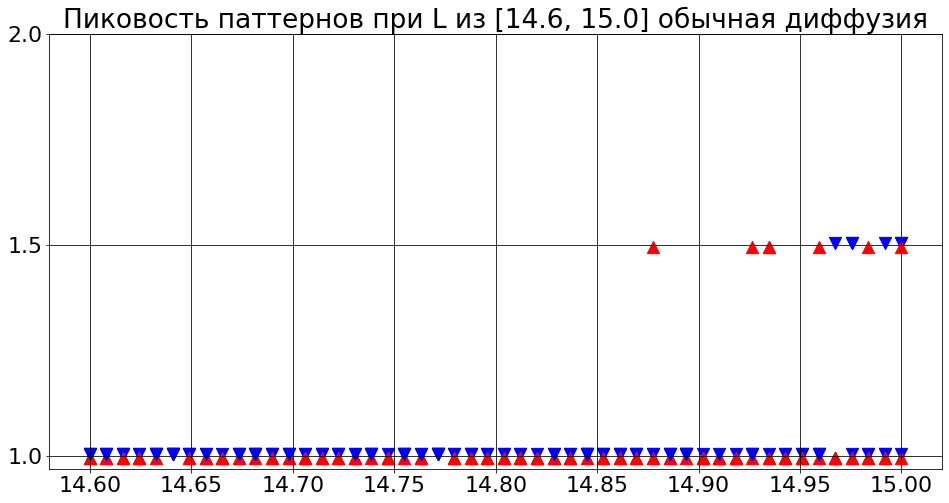

In [70]:
draw_pick_stats('normal_diffusion_L_from_14.6_to_15.0', 150)

уникальные значения пиковости на отрезке: {1.0, 1.5}
Дыр нет


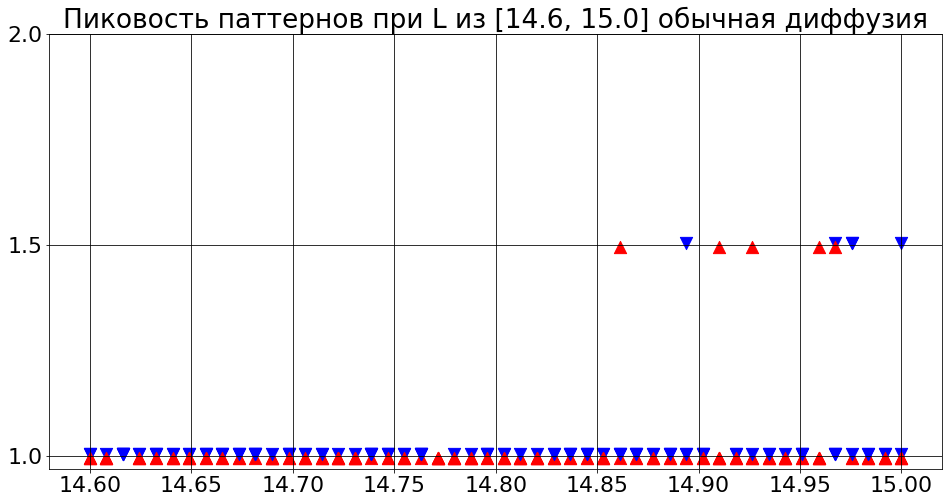

In [71]:
draw_pick_stats('normal_diffusion_L_from_14.6_to_15.0_check', 150)

уникальные значения пиковости на отрезке: {0.0, 1.0, 2.0, 2.5, 1.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 11.0, 12.0, 10.5, 11.5}
Начала дыр: [7.9745222929936315]


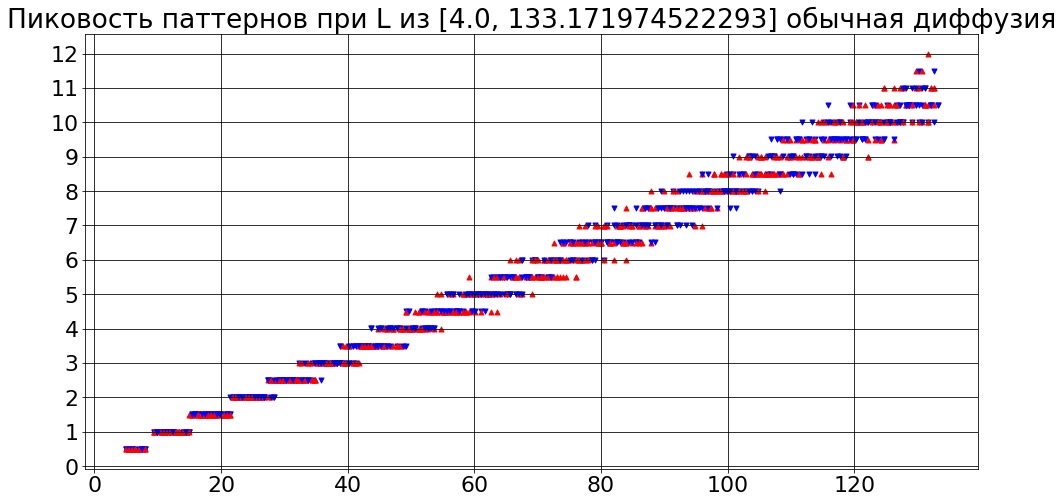

In [72]:
draw_pick_stats('normal_diffusion_L_from_4_to_160', 25)

уникальные значения пиковости на отрезке: {0.0, 1.0, 1.5}
Начала дыр: [7.9745222929936315]


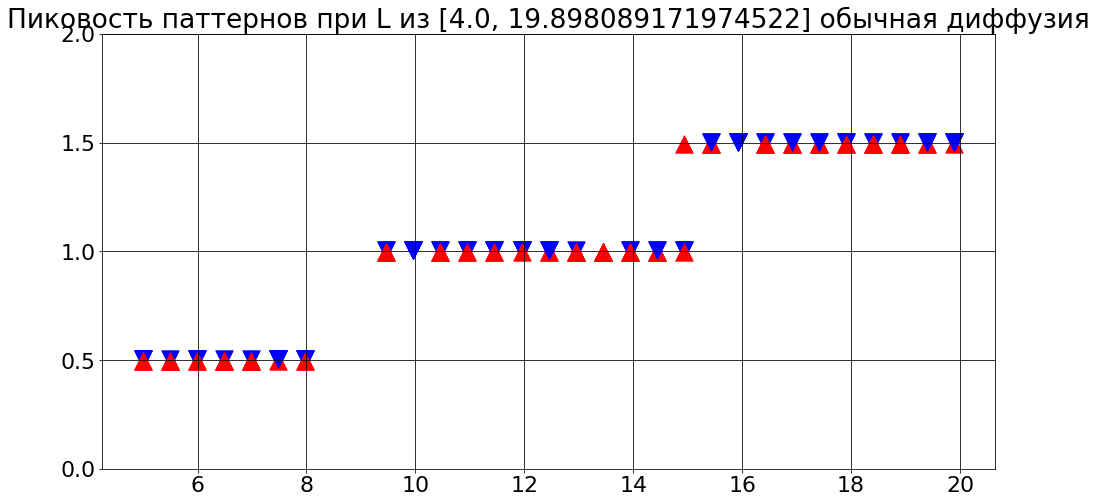

In [73]:
draw_pick_stats('normal_diffusion_L_from_4_to_160', 300,0,20)

уникальные значения пиковости на отрезке: {0.0}
Дыр нет


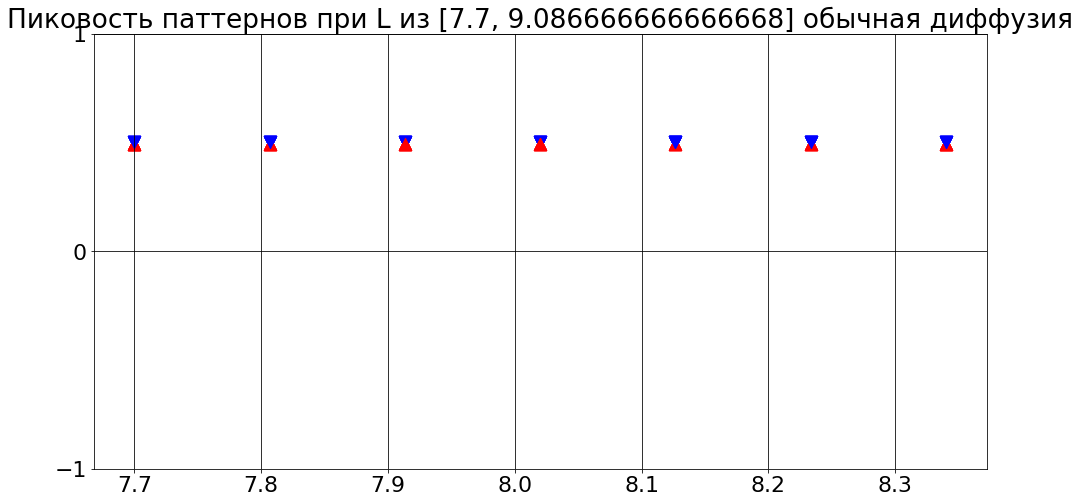

In [147]:
base_dir = 'D:\\math\\data'
subdir = os.path.join('normal_diffusion_L_from_8_to_10_check')
draw_pick_stats(subdir, 150)
base_dir = 'data'

уникальные значения пиковости на отрезке: {0.0}
Дыр нет


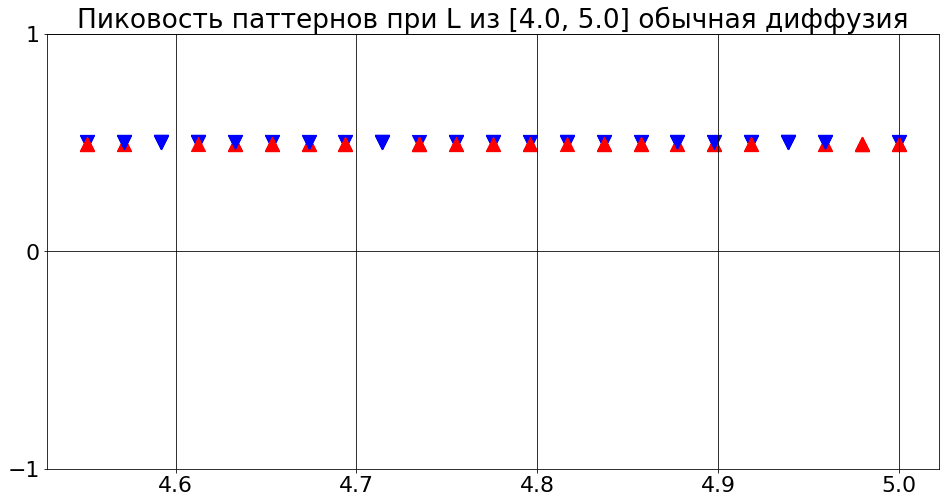

In [148]:
draw_pick_stats('normal_diffusion_L_from_4_to_5_check', 200)

уникальные значения пиковости на отрезке: {3.5, 3.0, 4.0, 4.5}
Дыр нет


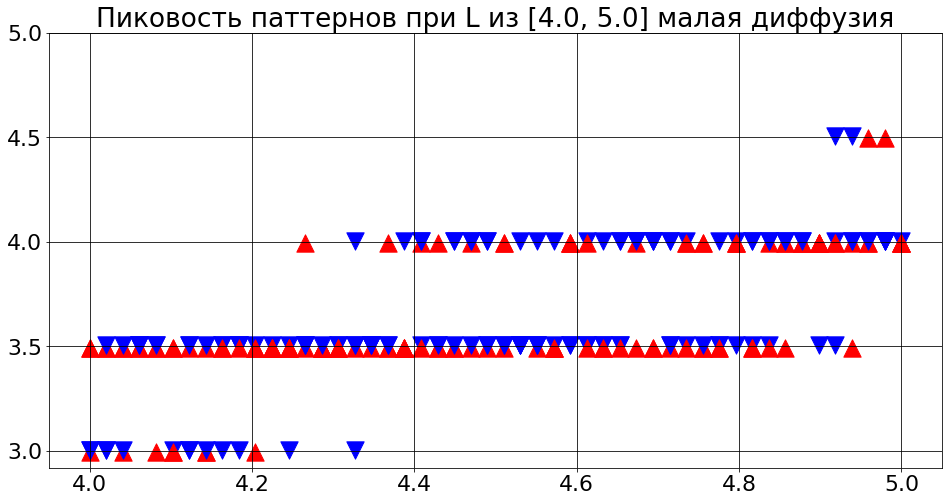

In [76]:
draw_pick_stats('small_diffusion_L_from_4_to_5', 300)

уникальные значения пиковости на отрезке: {3.0, 3.5, 4.0, 4.5}
Дыр нет


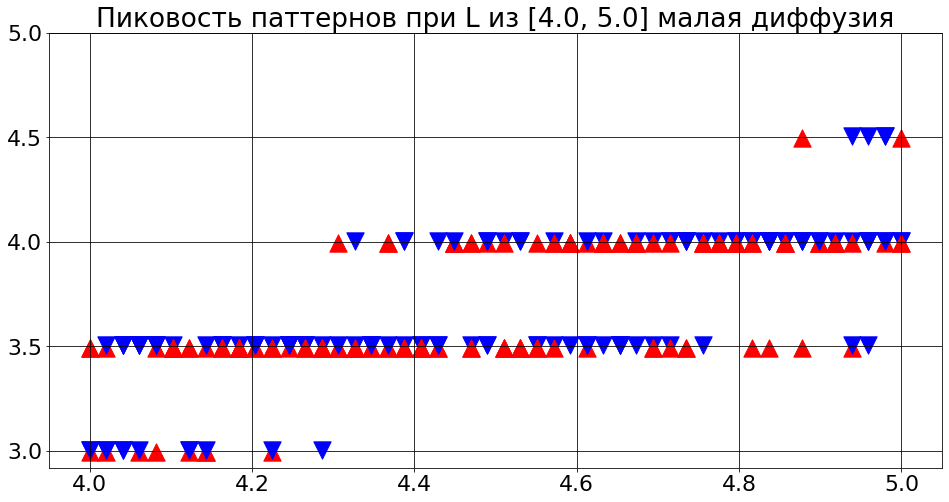

In [149]:
draw_pick_stats('small_diffusion_L_from_4_to_5_check', 300)

1


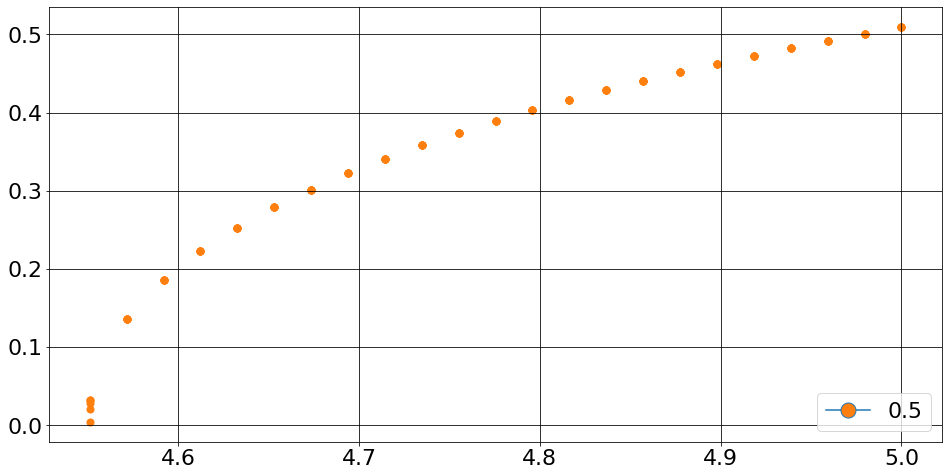

In [141]:
cals_amp_stats('normal_diffusion_L_from_4_to_5')

9


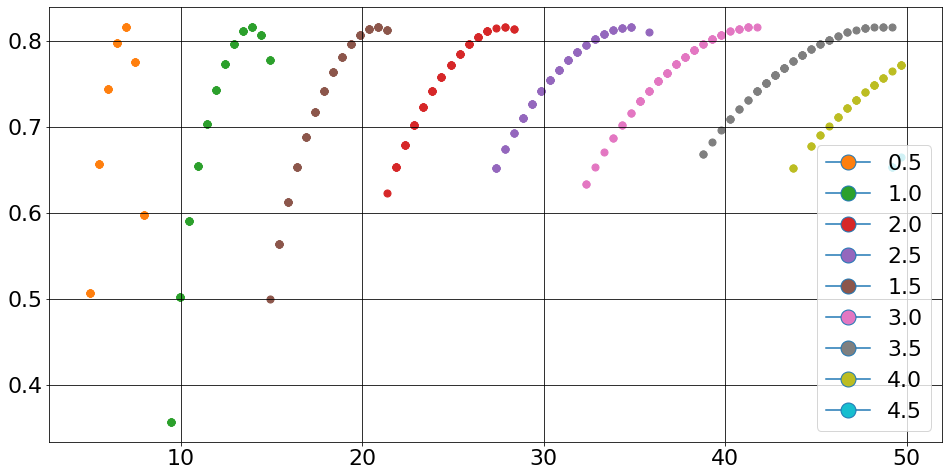

In [7]:
cals_amp_stats('normal_diffusion_L_from_4_to_160',0,50)

9


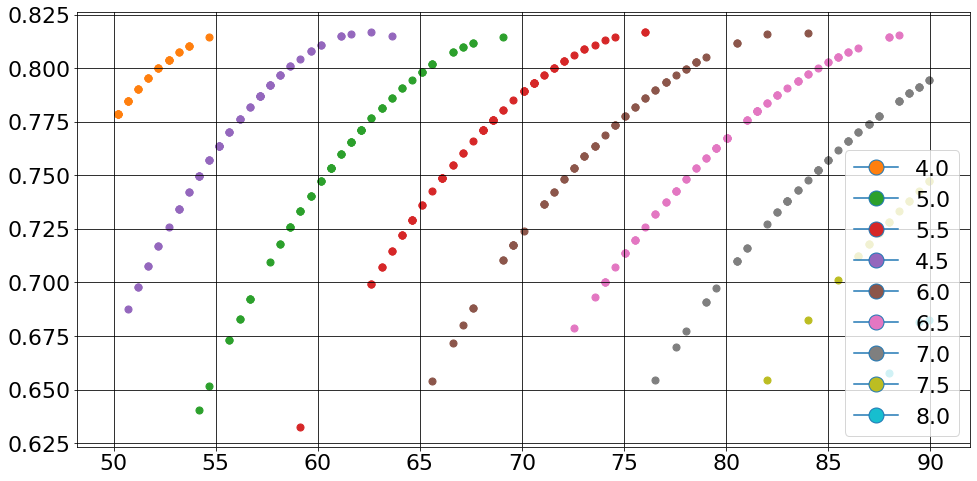

In [143]:
cals_amp_stats('normal_diffusion_L_from_4_to_160',50,90)

8


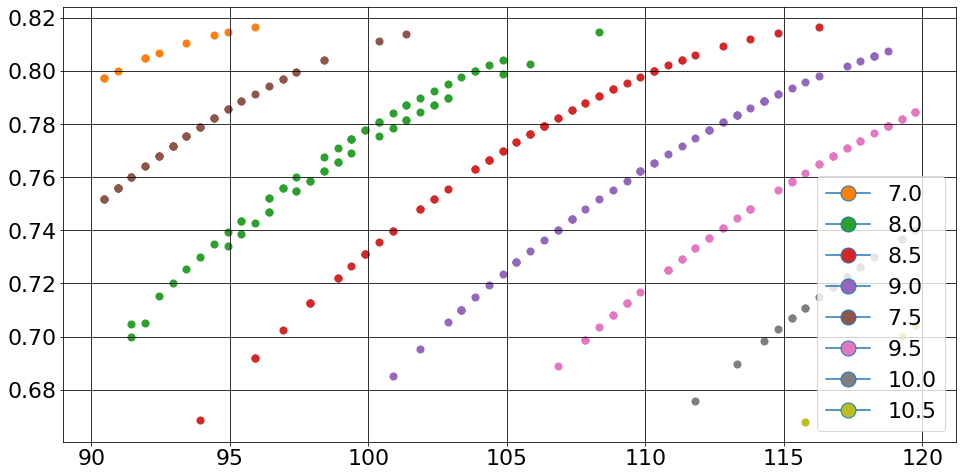

In [8]:
cals_amp_stats('normal_diffusion_L_from_4_to_160',90,120)

7


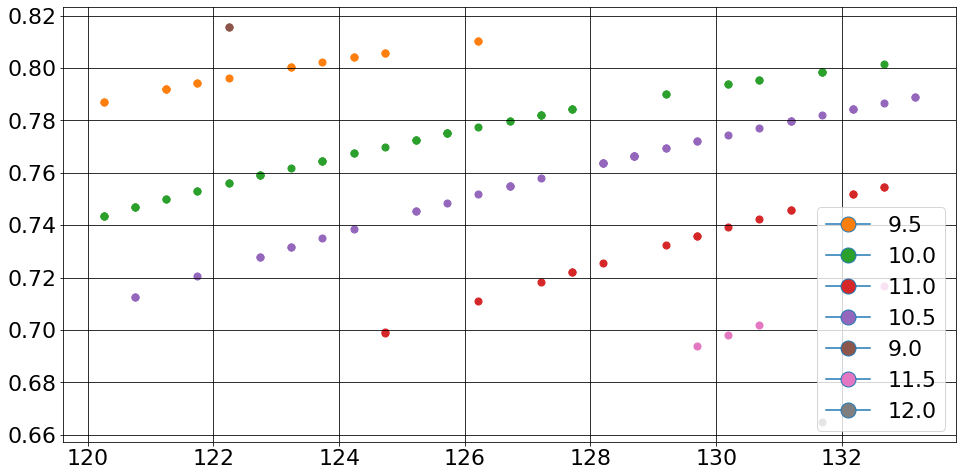

In [145]:
cals_amp_stats('normal_diffusion_L_from_4_to_160',120,140)